### Step 1:
Load the dataset

In [20]:
pip install yellowbrick

   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/282.6 kB 330.3 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/282.6 kB 330.3 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/282.6 kB 330.3 kB/s eta 0:00:01
   ---------------- --------------------- 122.9/282.6 kB 554.9 kB/s eta 0:00:01
   -------------------- ----------------- 153.6/282.6 kB 538.9 kB/s eta 0:00:01
   -------------------------------------  276.5/282.6 kB 811.7 kB/s eta 0:00:01
   -------------------------------------- 282.6/282.6 kB 791.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [5]:
trip_advi_df = pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\HRUTUJA\Imarticus\Statistics\tripadvisor_review.csv")
trip_advi_df

,User_ID,Category_1,Category_2,Category_3,Category_4,Category_5,Category_6,Category_7,Category_8,Category_9,Category_10
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...,...
975,User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,User 979,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


In [7]:
trip_Final = trip_advi_df.copy()

####  Removing Unnecessary variable

In [10]:
del trip_advi_df['User_ID']

In [12]:
trip_advi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category_1   980 non-null    float64
 1   Category_2   980 non-null    float64
 2   Category_3   980 non-null    float64
 3   Category_4   980 non-null    float64
 4   Category_5   980 non-null    float64
 5   Category_6   980 non-null    float64
 6   Category_7   980 non-null    float64
 7   Category_8   980 non-null    float64
 8   Category_9   980 non-null    float64
 9   Category_10  980 non-null    float64
dtypes: float64(10)
memory usage: 76.7 KB


In [14]:
trip_advi_df.head()

,Category_1,Category_2,Category_3,Category_4,Category_5,Category_6,Category_7,Category_8,Category_9,Category_10
0,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


### Step 2:
Extract the measurements from the DataFrame using its .values attribute:

In [17]:
samples = trip_advi_df.values # get all row and columne with header 
samples

array([[0.93, 1.8 , 2.29, ..., 2.79, 1.82, 2.42],
       [1.02, 2.2 , 2.66, ..., 2.63, 1.86, 2.32],
       [1.22, 0.8 , 0.54, ..., 2.8 , 1.31, 2.5 ],
       ...,
       [0.61, 1.32, 0.67, ..., 2.81, 1.34, 3.02],
       [0.93, 0.2 , 0.13, ..., 2.98, 1.12, 2.46],
       [0.93, 0.56, 1.13, ..., 2.87, 1.34, 2.4 ]])

### Step 3: Elbow Method 
1. Measure the quality of clusterings with different numbers of clusters using the inertia. 

2. For each of the given values of k, perform the following steps:
3. Create a KMeans instance called model with k clusters.
4. Fit the model to the grain data samples.
5. Append the value of the inertia_ attribute of model to the list inertias.

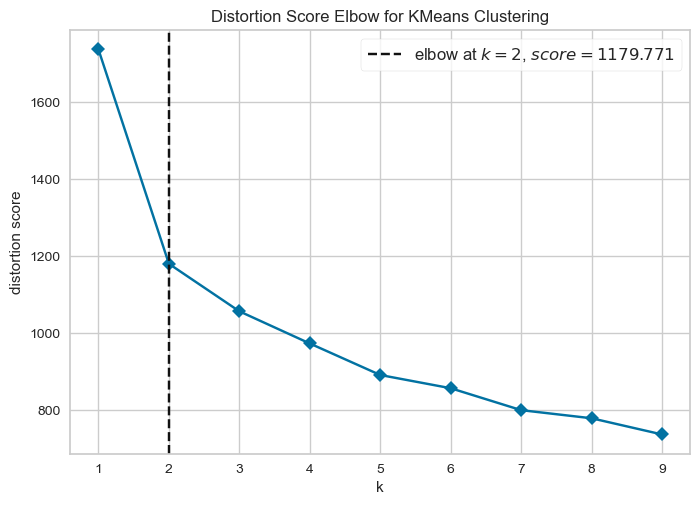

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,10),timings=False)
visualizer.fit(samples)        # Fit the data to the visualizer
visualizer.show()

# Model or Algorithm

In [22]:
model2 = KMeans(n_clusters=3,max_iter=100,random_state=42)#max_iter=100 by default 100

In [24]:
trip_Final['Cluster_Made'] = model2.fit_predict(samples)
trip_Final.head()

,User_ID,Category_1,Category_2,Category_3,Category_4,Category_5,Category_6,Category_7,Category_8,Category_9,Category_10,Cluster_Made
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,1
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,1
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,2
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,2
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,1


In [26]:
trip_Final.Cluster_Made = trip_Final.Cluster_Made.replace([0,1,2],['First Group','Second Group','Third Group'])
trip_Final.head()

,User_ID,Category_1,Category_2,Category_3,Category_4,Category_5,Category_6,Category_7,Category_8,Category_9,Category_10,Cluster_Made
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,Second Group
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,Second Group
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,Third Group
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,Third Group
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,Second Group


### Final Cluster Centorids 

In [29]:
model2.cluster_centers_

array([[0.86627451, 1.46007843, 0.49909804, 0.62098039, 1.07662745,
        2.10478431, 3.17878431, 2.86768627, 1.68423529, 2.80576471],
       [0.87831832, 1.44156156, 1.92576577, 0.56627628, 1.18948949,
        2.19105105, 3.18795796, 2.80135135, 1.52558559, 2.57681682],
       [0.92334184, 1.20714286, 0.57267857, 0.44625   , 0.63852041,
        1.37678571, 3.17637755, 2.84247449, 1.53201531, 2.98390306]])

In [31]:
trip_Final.Cluster_Made.value_counts(ascending=False)

Cluster_Made
Third Group     392
Second Group    333
First Group     255
Name: count, dtype: int64

# Business Submission

In [34]:
Submission = trip_Final.loc[:,['User_ID','Cluster_Made']]
Submission

,User_ID,Cluster_Made
0,User 1,Second Group
1,User 2,Second Group
2,User 3,Third Group
3,User 4,Third Group
4,User 5,Second Group
...,...,...
975,User 976,Third Group
976,User 977,Third Group
977,User 978,First Group
978,User 979,Third Group


In [40]:
Submission.to_excel(r'C:\Users\lenovo\OneDrive\Desktop\HRUTUJA\Imarticus\k-mean.xlsx',index=False,sheet_name="Output") 

# Finished